In [67]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.cm as cm
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.dates as mdates
from datetime import datetime
from datetime import timedelta

In [129]:
#binary search algorithm for finding closest date in a list to the given date
#returns list element index for element within delta of given date
def findNearestDate(alist, date, delta):
    first = 0
    last = len(alist)-1
    found = False
    index = -1
    #print 'finding date closest to', date, ' between ', alist[first], ' and ', alist[last]

    while first<=last and not found:
        midpoint = (first + last)//2
        #print 'comparing difference of ', alist[midpoint]-date, ' to ', delta
        if abs(alist[midpoint]-date) < delta :
            index = midpoint
            found = True
        else:
            if date < alist[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1
    if index==-1:
        print 'ERROR: failed to find date closest to ', date
    if index==0:
        print 'WARNING: index is unexpectedly first entry in array!'
    return index

In [140]:
date = []
Bi214 = []
K40 = []
Cs134 = []
Cs137 = []
line = 0
with open('airmonitor_weather_data.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
        if line == 0:
            print ", ".join(row)
        else:
            date.append(datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S'))
            Bi214.append(float(row[1]))
            K40.append(float(row[2]))
            Cs134.append(float(row[3]))
            Cs137.append(float(row[4]))
        line += 1
print 'collected data between ', date[0], ' and ', date[-1]
print len(date)

Time,  Bi214,  K40,  Cs134,  Cs137
collected data between  2016-03-03 06:16:29  and  2016-03-18 10:19:35
360


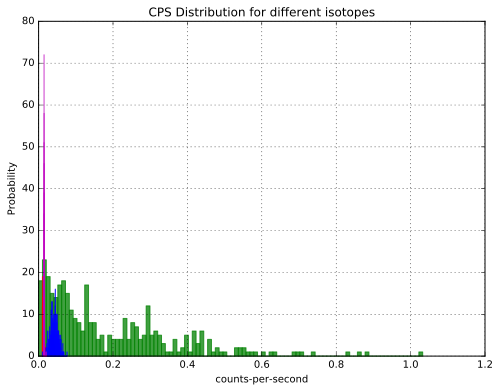

In [3]:
n, Bi_bins, Bi_patches = plt.hist(Bi214, 100, facecolor='g', edgecolor='g', alpha=0.75)
n, K40_bins, K_patches = plt.hist(K40, 100, facecolor='r', edgecolor='r', alpha=0.75)
n, Cs34_bins, Cs34_patches = plt.hist(Cs134, 100, facecolor='b', edgecolor='b', alpha=0.75)
n, Cs37_bins, CS37_patches = plt.hist(Cs137, 100, facecolor='m', edgecolor='m', alpha=0.75)

plt.xlabel('counts-per-second')
plt.ylabel('Probability')
plt.title('CPS Distribution for different isotopes')
plt.grid(True)
plt.show()


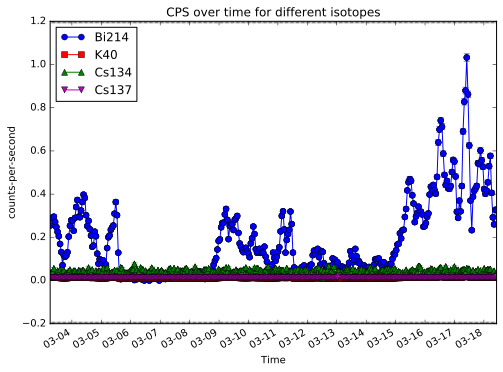

In [63]:
fig, ax = plt.subplots()

ax.plot(date, Bi214, 'bo-', label="Bi214")
ax.errorbar(date, Bi214, yerr=np.sqrt(Bi214)/60.0, fmt='bo', ecolor='b')
ax.plot(date, K40, 'rs-', label="K40")
ax.errorbar(date, K40, yerr=np.sqrt(K40)/60.0, fmt='rs-', ecolor='r')
ax.plot(date, Cs134, 'g^-', label="Cs134")
ax.errorbar(date, Cs134, yerr=np.sqrt(Cs134)/60.0, fmt='g^-', ecolor='g')
ax.plot(date, Cs137, 'mv-', label="Cs137")
ax.errorbar(date, Cs137, yerr=np.sqrt(Cs137)/60.0, fmt='mv-', ecolor='m')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=2)

# plot on log scale (y-axis)
#ax.set_yscale("log", nonposy='clip')

# format the ticks
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_minor_locator(mdates.HourLocator())

ax.set_xlim(date[0], date[-1])

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.ylabel('counts-per-second')
plt.xlabel('Time')
plt.title('CPS over time for different isotopes')

plt.show()

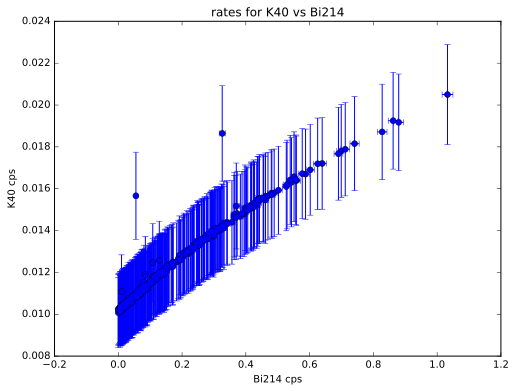

In [32]:
plt.plot(Bi214,K40, 'bo')

#errors based on 1hr count collection time converted to counts-per-second
# fmt="none" stops the plot from drawing lines connecting each point
plt.errorbar(Bi214, K40, xerr=np.sqrt(Bi214)/60.0, yerr=np.sqrt(K40)/60.0, fmt="none")

plt.ylabel('K40 cps')
plt.xlabel('Bi214 cps')
plt.title('rates for K40 vs Bi214')

plt.show()

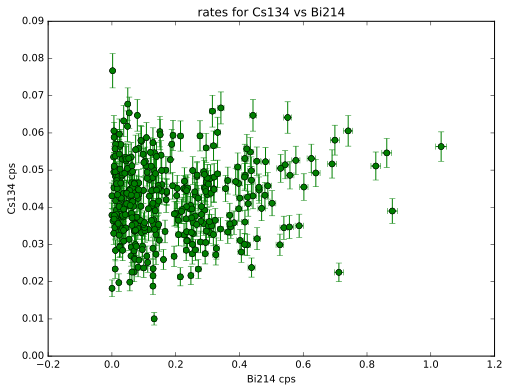

In [44]:
plt.plot(Bi214,Cs134, 'go')

#errors based on 1hr count collection time converted to counts-per-second
# fmt="none" stops the plot from drawing lines connecting each point
plt.errorbar(Bi214, Cs134, xerr=np.sqrt(Bi214)/60.0, yerr=np.sqrt(Cs134)/60.0, fmt='go', ecolor='g')

plt.ylabel('Cs134 cps')
plt.xlabel('Bi214 cps')
plt.title('rates for Cs134 vs Bi214')

plt.show()

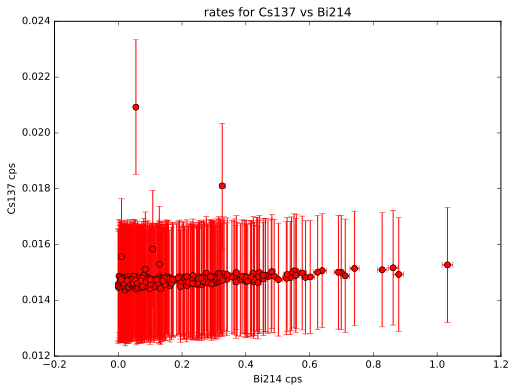

In [45]:
plt.plot(Bi214,Cs137, 'ro')

#errors based on 1hr count collection time converted to counts-per-second
# fmt="none" stops the plot from drawing lines connecting each point
plt.errorbar(Bi214, Cs137, xerr=np.sqrt(Bi214)/60.0, yerr=np.sqrt(Cs137)/60.0, fmt='ro', ecolor='r')

plt.ylabel('Cs137 cps')
plt.xlabel('Bi214 cps')
plt.title('rates for Cs137 vs Bi214')

plt.show()

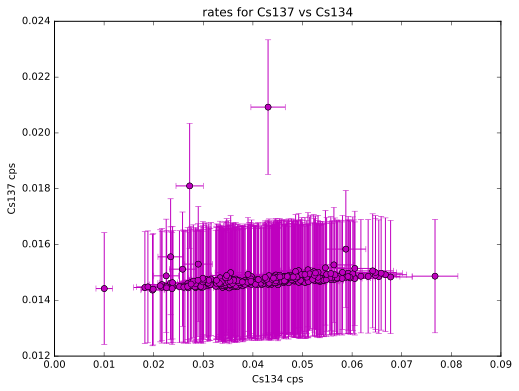

In [46]:
plt.plot(Cs134,Cs137, 'mo')

#errors based on 1hr count collection time converted to counts-per-second
# fmt="none" stops the plot from drawing lines connecting each point
plt.errorbar(Cs134, Cs137, xerr=np.sqrt(Cs134)/60.0, yerr=np.sqrt(Cs137)/60.0, fmt='mo', ecolor='m')

plt.ylabel('Cs137 cps')
plt.xlabel('Cs134 cps')
plt.title('rates for Cs137 vs Cs134')

plt.show()

In [69]:
DoseNet_Date = []
DoseNet_CPM = []
line = 0
with open('etch_roof.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
        if line == 0:
            print ", ".join(row)
        else:
            DoseNet_Date.append(datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S'))
            DoseNet_CPM.append(float(row[1]))
        line += 1
len(DoseNet_Date)

receiveTime, cpm, cpmError


33955

In [111]:
delta = timedelta(minutes=5)
min_date_index = findNearestDate(DoseNet_Date, date[0], delta)
max_date_index = findNearestDate(DoseNet_Date, date[-1], delta)
print 'found range of dates to be between', DoseNet_Date[min_date], ' and ', DoseNet_Date[max_date]

finding date closest to 2016-03-03 06:16:29  between  2015-11-19 18:27:13  and  2016-03-22 21:45:10
finding date closest to 2016-03-18 10:19:35  between  2015-11-19 18:27:13  and  2016-03-22 21:45:10
found range of dates to be between 2016-03-03 06:20:16  and  2016-03-18 10:20:12


In [115]:
#slice out dosenet data in same range as air monitor data
DoseNet_sub = DoseNet_Date[min_date:(max_date+1)]
DoseNet_sub[0]

datetime.datetime(2016, 3, 3, 5, 20, 20)

In [156]:
# air monitor data is recorded every hour based on counts collected since the last recording
# DoseNet data is taken every 5 minutes
#-> to compare the two we need to sum DoseNet data over the corresponding hour
def add(x,y): return x+y

CPM_reduced = []
# since integration window may vary we need to keep track of error separately
CPM_error = []
# keep track of air monitor date corresponding to each reduced CPM entry
DoseNet_date_reduced = []

#CPM and date are indexed exactly the same
# -> we should be able to use date index finder for reducing CPM data
# otherwise try something smarter like a map with date as key
delta = timedelta(minutes=5)
min_index = findNearestDate(DoseNet_Date, date[0], delta)+1

# first entry in reduced array is summed CPM from hour prior to first entry in air monitor data
CPM_sub = DoseNet_CPM[(min_index-12):min_index]
print reduce(add, 5*CPM_sub)
CPM_error.append(np.sqrt(reduce(add, 5*CPM_sub))/(5*len(CPM_sub)))
CPM_reduced.append(reduce(add, CPM_sub)/len(CPM_sub))
DoseNet_date_reduced.append(date[0])
print 'recorded', CPM_reduced[0], '=/-', CPM_error[0], 'on', date[0]

#now loop over all dates in air monitor data and merge DoseNet CPM for the previous hour
# increment index by one to included data taken at same time as monitor data
for i in range(0,len(date)-1) :
    min_index = findNearestDate(DoseNet_Date, date[i], delta)+1
    #make sure a valid index is returned and if not move on to next date
    while min_index==0:
        i+=1
        min_index = findNearestDate(DoseNet_Date, date[i], delta)+1
        print 'missed an index - moving to next entry'

    max_index = findNearestDate(DoseNet_Date, date[i+1], delta)+1
    #make sure a valid index is returned and if not move on to next date
    while max_index==0:
        i+=1
        max_index = findNearestDate(DoseNet_Date, date[i+1], delta)+1
        print 'missed an index - moving to next entry'

    CPM_sub = DoseNet_CPM[min_index:max_index]
    #add all points in this slice of last hour and append to new DoseNet data array
    # counting statistic -> error/min = sqrt(N_counts)/N_min (5min per entry)
    CPM_error.append(np.sqrt(reduce(add, 5*CPM_sub))/(5*len(CPM_sub)))
    CPM_reduced.append(reduce(add, CPM_sub)/len(CPM_sub))
    #print 'recorded', CPM_reduced[i], '=/-', CPM_error[i], 'on', date[i+1]
    DoseNet_date_reduced.append(date[i+1])
    i+=1


133.0
recorded 2.21666666667 =/- 0.192209376578 on 2016-03-03 06:16:29
ERROR: failed to find date closest to  2016-03-16 16:51:37
missed an index - moving to next entry
ERROR: failed to find date closest to  2016-03-16 16:51:37
missed an index - moving to next entry


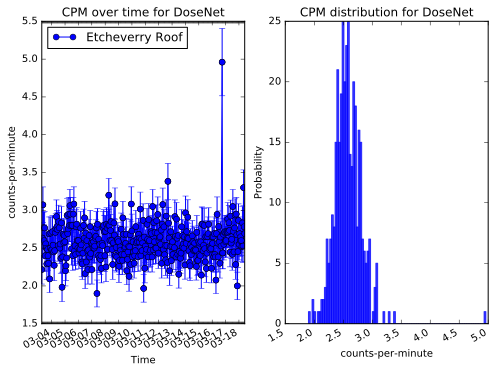

In [228]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(DoseNet_date_reduced, CPM_reduced, 'bo-', label="Etcheverry Roof")

#errors based on 1hr count collection time converted to counts-per-second
# fmt="none" stops the plot from drawing lines connecting each point
ax1.errorbar(DoseNet_date_reduced, CPM_reduced, yerr=CPM_error, fmt='bo', ecolor='b')

#make legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=2)

# format the ticks
ax1.xaxis.set_major_locator(mdates.DayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_minor_locator(mdates.HourLocator())

ax1.set_xlim(DoseNet_date_reduced[0], DoseNet_date_reduced[-1])

ax1.fmt_xdata = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

ax1.set_ylabel('counts-per-minute')
ax1.set_xlabel('Time')
ax1.set_title('CPM over time for DoseNet')


n, bins, patches = ax2.hist(CPM_reduced, 100, facecolor='b', edgecolor='b', alpha=0.75)
ax2.set_ylabel('Probability')
ax2.set_xlabel('counts-per-minute')
ax2.set_title('CPM distribution for DoseNet')

plt.show()

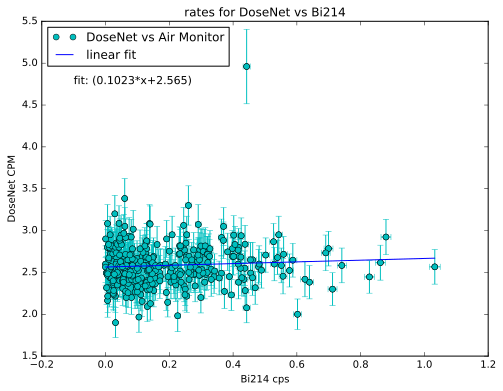

In [197]:
fig, ax = plt.subplots()

coefficients = np.polyfit(Bi214, CPM_reduced, 1)
polynomial = np.poly1d(coefficients)
fit = polynomial(Bi214)

plt.plot(Bi214,CPM_reduced, 'co', label="DoseNet vs Air Monitor")
plt.errorbar(Bi214, CPM_reduced, xerr=np.sqrt(Bi214)/60.0, yerr=CPM_error, fmt='co', ecolor='c')

plt.plot(Bi214, fit, label="linear fit")

plt.ylabel('DoseNet CPM')
plt.xlabel('Bi214 cps')
plt.title('rates for DoseNet vs Bi214')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=2)

fit_text = ("fit: (%s*x+%s)" % ("%.4G" % coefficients[0], "%.4G" % coefficients[1]))
ax.text(-.1, 4.75, fit_text, fontsize=11)

plt.show()

In [222]:
def calculateCorrelationCoefficient(data_x, data_y):
    # stats are [average, variance]
    x_stats = [0,0]
    y_stats = [0,0]
    ndata = len(data_x)
    for i in range(0,ndata):
        x_stats[0] += data_x[i]
        y_stats[0] += data_y[i]

    x_stats[0] = x_stats[0]/ndata
    y_stats[0] = y_stats[0]/ndata

    sum_xy = 0
    for i in range(0,ndata):
        sum_xy += (data_x[i]-x_stats[0])*(data_y[i]-y_stats[0])
        x_stats[1] += (data_x[i]-x_stats[0])*(data_x[i]-x_stats[0])
        y_stats[1] += (data_y[i]-y_stats[0])*(data_y[i]-y_stats[0])

    #correlation coefficient generally referred to as r
    # r = sum( (x-ave_x)*(y-ave_y) ) / sqrt( sum( (x-ave_x)^2 )*sum( (y-ave_y)^2 ) )
    r = sum_xy/np.sqrt(x_stats[1]*y_stats[1])

    #calculate variance of x(y) from sum of delta-x(y) squared
    x_stats[1] = np.sqrt(x_stats[1]/(ndata-1))
    y_stats[1] = np.sqrt(y_stats[1]/(ndata-1))
    
    return r, x_stats, y_stats

In [223]:
def calculateSigma(func, data):
    sum_sqrs = 0
    for i in range(0,len(func)):
        diff = abs(func[i]-data[i])
        sum_sqrs += diff*diff
        
    rms = np.sqrt(sum_sqrs)/(len(func)-2)
    return rms

In [224]:
#returns correlation coefficient (r), and [mean,variance] for both data-sets respectively
r, stats_B, stats_D = calculateCorrelationCoefficient(Bi214,CPM_reduced)
print r, stats_B, stats_D

0.0715232076917 [0.18674162016818457, 0.17689939205333494] [2.583653628506571, 0.253076180936051]


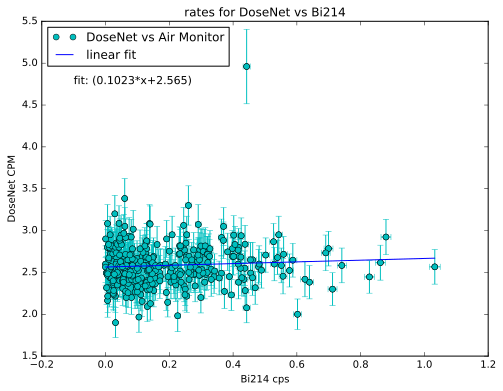

In [232]:
# try plotting with y=mx+b determined from least squares

# slope = r*var_y/var_x
slope = r*stats_D[1]/stats_B[1]
# intercept = <Y> - slope*<X>
intercept = stats_D[0] - slope*stats_B[0]

fig, ax = plt.subplots()
polynomial = np.poly1d([slope, intercept])
fit = polynomial(Bi214)

plt.plot(Bi214,CPM_reduced, 'co', label="DoseNet vs Air Monitor")
plt.errorbar(Bi214, CPM_reduced, xerr=np.sqrt(Bi214)/60.0, yerr=CPM_error, fmt='co', ecolor='c')

plt.plot(Bi214, fit, label="linear fit")

plt.ylabel('DoseNet CPM')
plt.xlabel('Bi214 cps')
plt.title('rates for DoseNet vs Bi214')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=2)

fit_text = ("fit: (%s*x+%s)" % ("%.4G" % slope, "%.4G" % intercept))
ax.text(-.1, 4.75, fit_text, fontsize=11)

plt.show()